<img src="https://raw.githubusercontent.com/sbarja/curso-intro-machine-learning-2023/main/figuras/cabecera.png" alt="Drawing" style="width: 1000px;"/>

# SOLUCIÓN ejercicio de aprendizaje supervisado: regresión.

## *Predicción de consumo en un edificio de oficinas para el día siguiente*

## Recordatorio: proceso de creación de un modelo de Machine Learning

<img src="https://raw.githubusercontent.com/sbarja/curso-intro-machine-learning-2023/main/figuras/creacion-modeloML.png" alt="Drawing" style="width: 800px;"/>

### DATA SET

### `EJ2-regresion-edificio.xlsx`

### Features/características 
* **diasemana**: indica si el día es laborable (lunes a viernes) o findesemana (sábado a domingo).
* **temp**: temperatura en (ºC).
* **op_nubes**: opacidad de las nubes. Cuanto más alto es este valor, más cubierto está el cielo (%).
* **temp_rocio**: temperatura de rocío (ºC).
* **irrad**: irradiancia (W/m2)
* **col_agua**: Agua precipitable. Es el total de vapor de agua en la columna atmosférica (mm).
* **hum_rel**: Humedad relativa (%).
* **rand**: Variable aleatoria.
* **presion**: Presión atmosférica.
* **dir_viento**: Dirección del viento.
* **vel_viento**: Velocidad del viento en m/s. 
* **vel_viento_2**: Velocidad del viento en km/h. 

### Target / etiqueta

* **consumo**: Consumo del edificio de oficinas en kWh

## **1. Importar librerías y datos**


In [1]:
# Importamos las librerías necesarias

import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargamos el conjunto de datos de entrada
data = pd.read_excel('dataset/EJ2-regresion-edificio.xlsx')


C:\Users\Usuario\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Usuario\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Usuario\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data

,fechahora,diasemana,temp,op_nubes,temp_rocio,irrad,precip_agua,hum_rel,rand,presion,dir_viento,vel_viento,vel_viento_2,consumo
0,2020-03-01 00:00:00,findesemana,12.6,20.5,6.8,0.0,18.4,68.1,93854,979.3,121,1.4,5.04,4.269
1,2020-03-01 01:00:00,findesemana,11.8,21.6,7.5,0.0,18.4,74.8,4852,979.1,121,2.1,7.56,4.246
2,2020-03-01 02:00:00,findesemana,11.0,25.1,7.7,0.0,18.2,80.3,5365,978.5,125,2.1,7.56,4.261
3,2020-03-01 03:00:00,findesemana,10.5,58.0,7.6,0.0,17.9,82.5,4867,978.3,130,1.7,6.12,4.232
4,2020-03-01 04:00:00,findesemana,10.4,53.8,7.7,0.0,18.9,83.4,4131,978.5,144,1.8,6.48,4.237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,2021-03-27 17:00:00,findesemana,12.6,51.4,7.8,39.0,15.2,72.4,5076,996.4,176,2.1,7.56,8.175
9401,2021-03-27 18:00:00,findesemana,11.7,93.4,7.7,0.0,14.7,76.6,6478,996.7,188,1.7,6.12,7.812
9402,2021-03-27 19:00:00,findesemana,11.1,95.7,7.5,0.0,14.1,78.9,9067,997.1,204,1.3,4.68,7.863
9403,2021-03-27 20:00:00,findesemana,10.6,94.9,7.3,0.0,13.7,80.0,8624,997.4,211,1.2,4.32,10.384


## **2. Comprender los datos**

Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. 

1. ¿Cuántos datos hay? ¿Cuántos atributos hay en los datos?  
2. Resumen estadístico del conjunto de datos de entrada.
3. ¿Falta algún dato?

**1. ¿Cuántos datos hay?**  **¿Cuántos atributos hay en los datos?** 

In [3]:
# Filasxcolumnas de los datos
data.shape

(9405, 14)

In [4]:
# Observa las primeras 5 filas de los datos para ver como son. 

data.head(50)


,fechahora,diasemana,temp,op_nubes,temp_rocio,irrad,precip_agua,hum_rel,rand,presion,dir_viento,vel_viento,vel_viento_2,consumo
0,2020-03-01 00:00:00,findesemana,12.6,20.5,6.8,0.0,18.4,68.1,93854,979.3,121,1.4,5.04,4.269
1,2020-03-01 01:00:00,findesemana,11.8,21.6,7.5,0.0,18.4,74.8,4852,979.1,121,2.1,7.56,4.246
2,2020-03-01 02:00:00,findesemana,11.0,25.1,7.7,0.0,18.2,80.3,5365,978.5,125,2.1,7.56,4.261
3,2020-03-01 03:00:00,findesemana,10.5,58.0,7.6,0.0,17.9,82.5,4867,978.3,130,1.7,6.12,4.232
4,2020-03-01 04:00:00,findesemana,10.4,53.8,7.7,0.0,18.9,83.4,4131,978.5,144,1.8,6.48,4.237
5,2020-03-01 05:00:00,findesemana,10.5,57.6,8.0,0.0,19.3,85.0,5540,978.6,148,2.4,8.64,4.280
6,2020-03-01 06:00:00,findesemana,10.6,47.4,8.3,6.0,16.8,85.5,7536,978.5,147,2.2,7.92,4.210
7,2020-03-01 07:00:00,findesemana,11.0,14.1,7.8,136.0,13.6,80.7,8845,978.5,159,1.5,5.40,4.345
8,2020-03-01 08:00:00,findesemana,11.9,0.6,6.5,331.0,12.2,69.3,5645,978.6,246,1.4,5.04,3.263
9,2020-03-01 09:00:00,findesemana,13.5,0.7,4.7,491.0,11.7,55.4,7290,978.6,272,4.3,15.48,3.252


In [5]:
# Formato de los datos: (enteros, obj, string, etc.)

data.dtypes
    
# fechahora -- todatetime
# diasemana -- LabelEncoder

fechahora       datetime64[ns]
diasemana               object
temp                   float64
op_nubes               float64
temp_rocio             float64
irrad                  float64
precip_agua            float64
hum_rel                float64
rand                     int64
presion                float64
dir_viento               int64
vel_viento             float64
vel_viento_2           float64
consumo                float64
dtype: object

In [6]:
# Si hay atributos categóricos, convertirlos a tipo int

from sklearn.preprocessing import LabelEncoder

# data 
lab_encoder = LabelEncoder() 
lab_encoder.fit(data['diasemana'])  
data['diasemana'] = lab_encoder.transform(data['diasemana'])




In [7]:
data

,fechahora,diasemana,temp,op_nubes,temp_rocio,irrad,precip_agua,hum_rel,rand,presion,dir_viento,vel_viento,vel_viento_2,consumo
0,2020-03-01 00:00:00,0,12.6,20.5,6.8,0.0,18.4,68.1,93854,979.3,121,1.4,5.04,4.269
1,2020-03-01 01:00:00,0,11.8,21.6,7.5,0.0,18.4,74.8,4852,979.1,121,2.1,7.56,4.246
2,2020-03-01 02:00:00,0,11.0,25.1,7.7,0.0,18.2,80.3,5365,978.5,125,2.1,7.56,4.261
3,2020-03-01 03:00:00,0,10.5,58.0,7.6,0.0,17.9,82.5,4867,978.3,130,1.7,6.12,4.232
4,2020-03-01 04:00:00,0,10.4,53.8,7.7,0.0,18.9,83.4,4131,978.5,144,1.8,6.48,4.237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,2021-03-27 17:00:00,0,12.6,51.4,7.8,39.0,15.2,72.4,5076,996.4,176,2.1,7.56,8.175
9401,2021-03-27 18:00:00,0,11.7,93.4,7.7,0.0,14.7,76.6,6478,996.7,188,1.7,6.12,7.812
9402,2021-03-27 19:00:00,0,11.1,95.7,7.5,0.0,14.1,78.9,9067,997.1,204,1.3,4.68,7.863
9403,2021-03-27 20:00:00,0,10.6,94.9,7.3,0.0,13.7,80.0,8624,997.4,211,1.2,4.32,10.384


In [8]:
# Si hay atributos de tipo fecha, transformarlos a datetime para operar con ellos
data['datetime'] = pd.to_datetime(data['fechahora'], format='%Y/%m/%d %H:%M')
data['hora'] = data['datetime'].dt.hour
data['mes'] = data['datetime'].dt.month
data.drop(columns=['fechahora', 'datetime'], inplace=True)

In [9]:
data.head()

,diasemana,temp,op_nubes,temp_rocio,irrad,precip_agua,hum_rel,rand,presion,dir_viento,vel_viento,vel_viento_2,consumo,hora,mes
0,0,12.6,20.5,6.8,0.0,18.4,68.1,93854,979.3,121,1.4,5.04,4.269,0,3
1,0,11.8,21.6,7.5,0.0,18.4,74.8,4852,979.1,121,2.1,7.56,4.246,1,3
2,0,11.0,25.1,7.7,0.0,18.2,80.3,5365,978.5,125,2.1,7.56,4.261,2,3
3,0,10.5,58.0,7.6,0.0,17.9,82.5,4867,978.3,130,1.7,6.12,4.232,3,3
4,0,10.4,53.8,7.7,0.0,18.9,83.4,4131,978.5,144,1.8,6.48,4.237,4,3


**2. Resumen estadístico del conjunto de datos de entrada:** La estadística descriptiva recolecta y analiza el conjunto de datos de entrada con el objetivo de describir las características y comportamientos de este conjunto mediante las siguientes medidas resumen: número total de observaciones (count), media (mean), desviación estándar (std), valor mínimo (min), valor máximo (max) y los valores de los diferentes cuartiles (25%, 50%, 75%).

In [10]:
# Datos estadísticos de cada uno de los atributos

data.describe()
    

,diasemana,temp,op_nubes,temp_rocio,irrad,precip_agua,hum_rel,rand,presion,dir_viento,vel_viento,vel_viento_2,consumo,hora,mes
count,9405.000000,9398.000000,9405.000000,9405.000000,9400.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000
mean,0.714514,15.953011,30.559755,8.964774,176.360957,19.570207,64.765263,6533.634131,985.742616,187.965338,2.449059,8.816612,17.511131,11.498671,6.284211
std,0.451670,6.351362,28.614943,5.774114,254.941743,7.721393,13.370106,2215.011120,6.694269,96.882310,1.601361,5.764898,12.133444,6.921103,3.444975
min,0.000000,1.500000,0.000000,-12.800000,0.000000,2.200000,21.700000,3000.000000,958.400000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,11.100000,4.300000,5.300000,0.000000,13.500000,55.100000,4760.000000,982.500000,108.000000,1.300000,4.680000,7.810000,6.000000,3.000000
50%,1.000000,15.100000,22.300000,9.000000,7.000000,18.700000,65.700000,6552.000000,986.200000,192.000000,2.100000,7.560000,14.363000,11.000000,6.000000
75%,1.000000,21.175000,52.000000,13.700000,311.000000,25.700000,75.000000,8263.000000,990.100000,269.000000,3.200000,11.520000,23.574000,17.000000,9.000000
max,1.000000,32.600000,97.000000,21.500000,962.000000,46.400000,96.000000,93854.000000,1004.800000,360.000000,11.700000,42.120000,77.258000,23.000000,12.000000


**3. ¿Falta algún dato? Comprobar si hay algun missing data (Nan, null...)** 

In [11]:
# Comprobar si falta algún dato y en qué atributo

data.isna().sum()


diasemana       0
temp            7
op_nubes        0
temp_rocio      0
irrad           5
precip_agua     0
hum_rel         0
rand            0
presion         0
dir_viento      0
vel_viento      0
vel_viento_2    0
consumo         0
hora            0
mes             0
dtype: int64

Si faltan datos, completa las casillas vacias con el valor medido anterior del atributo: utiliza *X["Columna"].fillna(method='XXXX', inplace=True)*

In [12]:
# Si falta algún dato, imputar valores 

data.fillna(method='ffill', inplace=True)

In [13]:
# Compruebo que efectivamente no hay Nan
data.isna().sum()

diasemana       0
temp            0
op_nubes        0
temp_rocio      0
irrad           0
precip_agua     0
hum_rel         0
rand            0
presion         0
dir_viento      0
vel_viento      0
vel_viento_2    0
consumo         0
hora            0
mes             0
dtype: int64

## **3. Visualizar los datos**

Una manera visual de entender los datos de entrada es mendiante la visualización de las siguientes gráficas. 
1. Histograma.
2. Curva de densidad.
3. Boxplots.
4. Matriz de correlación.


**1. Histograma**

Respresentación gráfica de cada uno de los atributos en forma de barras, donde la superficie de la barra es proporcional a la frecuencia de los valores representados.

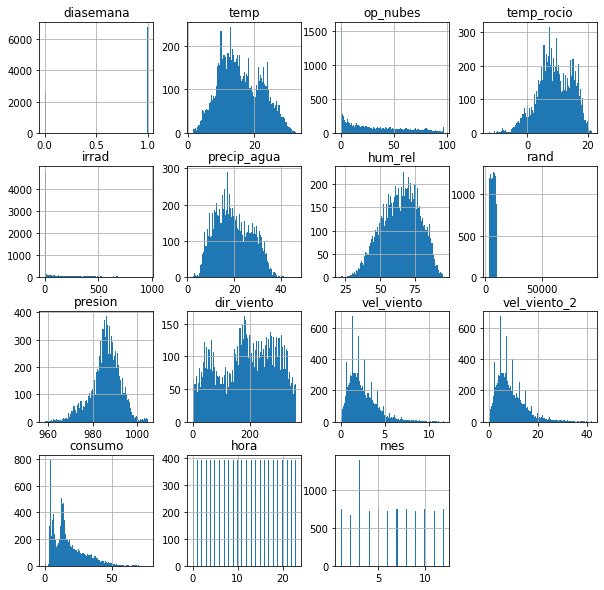

In [14]:
histograma = data.hist(xlabelsize=10, ylabelsize=10, bins=100, figsize=(10, 10))

**2. Gráfico de densidades**

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo spicos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

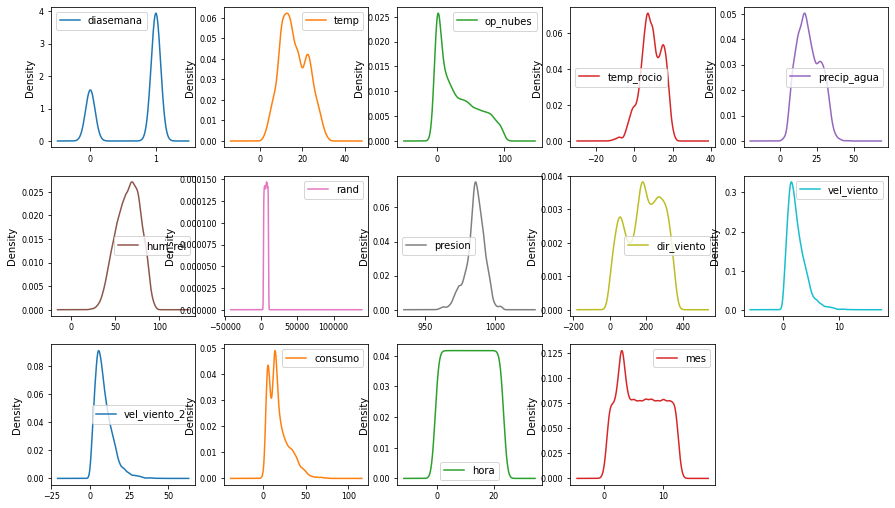

In [15]:
density = data.plot(kind='kde', x=4, subplots=True, legend=True, layout=(5, 5), figsize=(15, 15), sharex=False,
                        fontsize=8, stacked=True) 

**3. Boxplots** 

El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja).

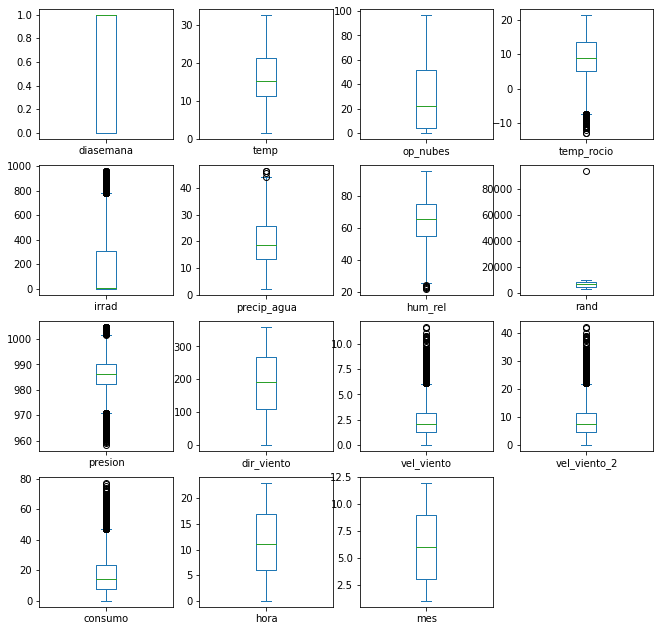

In [16]:
atributos_boxplot = data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(11, 11), sharex=False,
                                 sharey=False, fontsize=10)

**4. Matriz de correlación** 

* ¿Qué característica(s) **no** tiene(n) ninguna correlación con la variable target? 


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7988\760146078.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


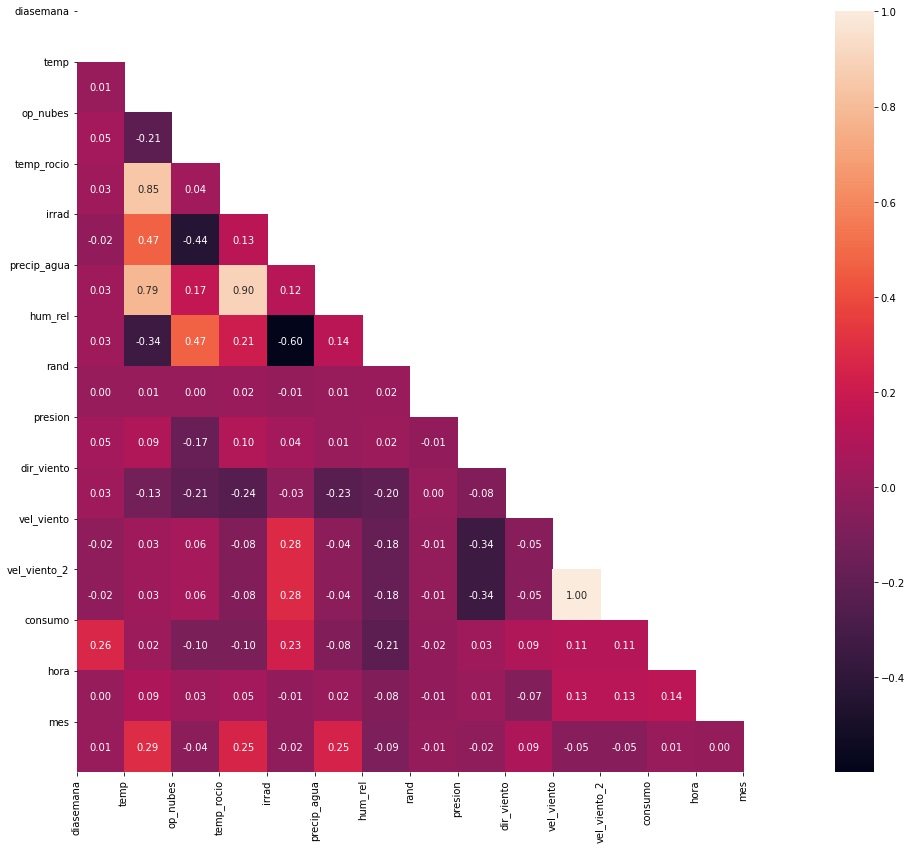

In [17]:
# Otra librería de visualización de datos
import seaborn as sns

# Cálculo de coeficientes de correlación
corr = data.corr(method='pearson') 

# Quitar valores repetidos
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generar Heat Map,
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    # yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    # plot
plt.show()

## *4. Preparar los datos*


1. LabelEncoding (si existen datos categóricos).
2. Feature engineering (proceso iterativo).
3. Transformación (escalado): una vez estés divididos los datos de train y test.

Primero, divido los datos en *atributos*: **X** (features) y *etiquetas*: **y** (target)

In [18]:
# Atributos X (features); etiquetas y (target)

X = data.drop(['consumo'], axis=1) 
y = data['consumo']

**2. Feature engineering**

Observando la matriz de correlación, **eliminar los atributos/características que no tengan ninguna correlación con la variable target (y)**.


In [19]:
# Elimino el atributo que tiene correlación cerca de 0 con el resto de características.

X.drop(['rand', 'vel_viento_2', 'presion'], axis=1, inplace=True)



## *5. Dividir los datos*

Dividir los datos en:
* X_train, y_train
* X_val, y_val

In [20]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # porcentaje de los datos de entrada que utilizaré para validar el modelo

# Divido los datos en datos de entreno, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=False)


**Transformación (escalado).**

* En este ejemplo no se escalan los datos, pero se podría hacer descomentando el código de abajo y cambiando X_train, X_test e X_val por X_train_scaled, X_test_scaled, X_val_scaled. 

* **Si lo estimais oportuno**, escalar los datos utilizando un método de escalado **(StandardScaler()/MinMaxScaler())**

<img src="https://raw.githubusercontent.com/sbarja/curso-intro-machine-learning-2023/main/figuras/scaling.png" alt="Drawing" style="width: 50px;"/>


In [21]:
# Escalado de datos (si procede)

#from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scaler =  StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_train_scaled

#X_test_scaled = scaler.fit_transform(X_test)
#X_test_scaled



In [22]:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size,
                shuffle=False)

## *6. Construcción y evaluación de modelos*

* Selecciona **RMSE** como métrica de evaluación. 
* Evalúa los algoritmos de regresión utilizados en la sesión 5 que estimes oportunos. Puedes buscar más en la librería scikitlearn. 


Métrica de evaluación:  neg_root_mean_squared_error
Modelo  DTR
Modelo  LR
Modelo  RFR
[('DTR', -8.321797337743117, 2.7419420253715145), ('LR', -11.475091067650268, 2.8847813894902674), ('RFR', -7.513905407217045, 3.135122050971436)]


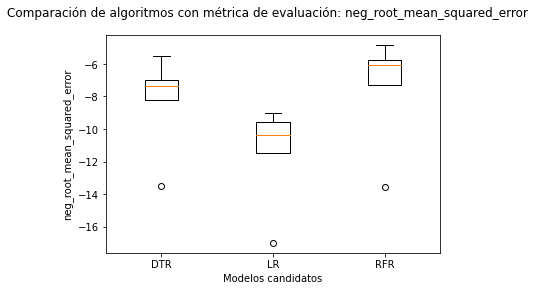

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


num_folds = 5
error_metrics = {'neg_root_mean_squared_error'} 
models = {('LR', LinearRegression()),
           ('DTR', DecisionTreeRegressor()), ('RFR', RandomForestRegressor())}


results = [] # guarda los resultados de las métricas de evaluación
names = []  # Nombre de cada algoritmo
msg = []  # imprime el resumen del método de cross-validation


from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

ite = 0

# Entreno con validación cruzada
for scoring in error_metrics:

    print('Métrica de evaluación: ', scoring)
    for name, model in models:
        print('Modelo ', name)
        cross_validation = KFold(n_splits=num_folds, shuffle=False)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        if ite == 0:
          names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Comparar resultados entre algoritmos
    fig = plt.figure()
    fig.suptitle('Comparación de algoritmos con métrica de evaluación: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Modelos candidatos')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)

    ax.set_xticklabels(names)
    plt.show()

    results = []

    ite += 1




* **¿Cuál obtiene mejores resultados?** 
* **¿Qué RMSE promedio obtiene?** 

## *7. Ajustar hiperparámetros*

Pasos para realizar el hiperajuste de los parámetros:

* Métrica para optimizar: **RMSE**
* Definir los rangos de los parámetros de búsqueda que estimes oportunos: *params*

In [32]:
# Ajustar los hiperparámetros del algoritmo que os ha dado mejores resultados en el training
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, KFold


#RandomForestClassifier
modelo = RandomForestRegressor()
params = {
     'n_estimators': [500, 1000], #default=100
     'min_samples_split': [2,5], #default=2
     'max_features': ['auto']  #default='auto'
 }
scoring='neg_root_mean_squared_error'
cross_validation = KFold(n_splits=5)
my_cv = cross_validation.split(X_val, y_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

print("Mejor resultado: %f utilizando los siguientes hiperparámetros %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print("%f (%f) with: %r" % (mean, stdev, param))

Mejor resultado: -9.419513 utilizando los siguientes hiperparámetros {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1000}
-9.467532 (1.793804) with: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}
-9.419513 (1.804844) with: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1000}
-9.422934 (1.815978) with: {'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 500}
-9.440024 (1.787060) with: {'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 1000}


## *8. Evaluación final del modelo*



Métricas de evaluación:
  * RMSE
    
**Entrena el modelo con los hiperparámetros óptimos encontrados en el apartado anterior y realiza las predicciones.** 

In [28]:

from sklearn.metrics import mean_squared_error
import numpy as np


# Entrena al modelo seleccionado con los hiperparámetros seleccionados y realiza las predicciones

modelo_final = RandomForestRegressor(max_features='auto', min_samples_split=2,  n_estimators=1000)
modelo_final.fit(X_train,y_train)  # Se entrena al modelo RF
y_predict = modelo_final.predict(X_test)  # Se calculan las predicciones


mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


y_predict


RMSE: 11.66706882276169


array([32.115039, 31.84111 , 31.970331, ...,  4.148061,  5.784679,
        5.760344])

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


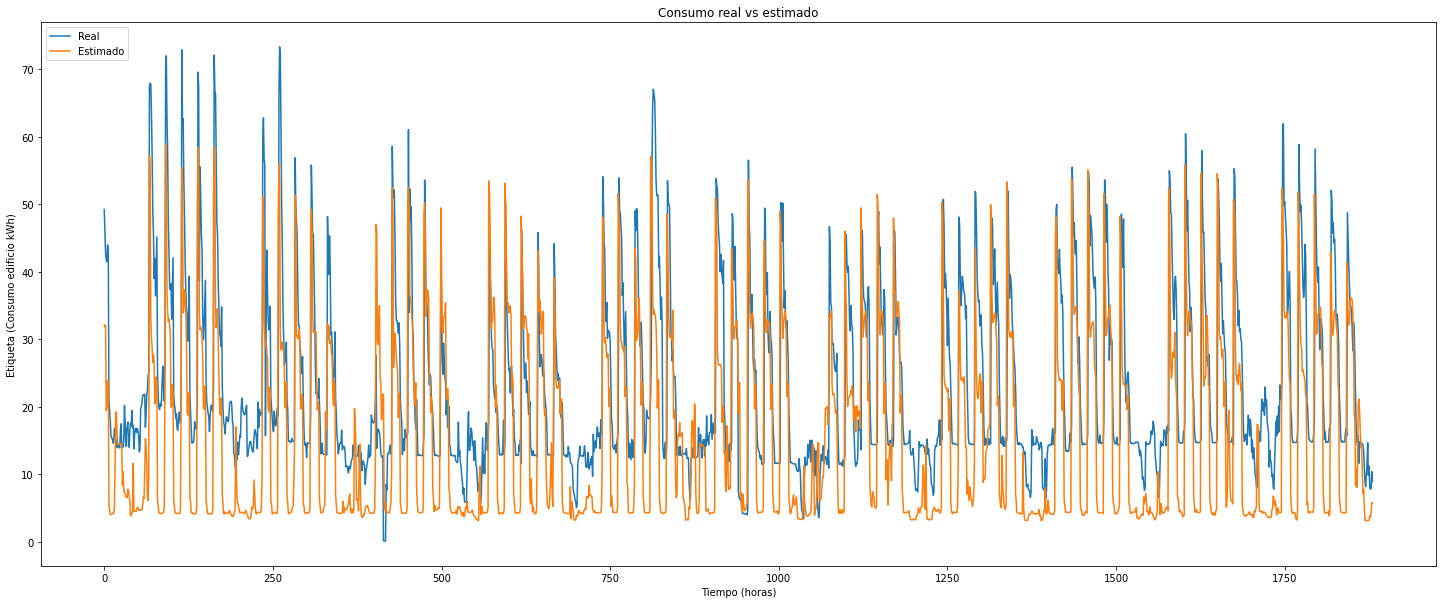

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(25, 10))
sns.lineplot(range(len(y_test)), y_test, label="Real")
sns.lineplot(range(len(y_predict)), y_predict, label="Estimado")
plt.title("Consumo real vs estimado")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Etiqueta (Consumo edificio kWh)")
plt.legend(loc="upper left")
plt.show()


# Los resultados no son muy precisos... volvemos al paso número 2 (feature selection) y creamos nuevas variables de entrada


<img src="https://raw.githubusercontent.com/sbarja/curso-intro-machine-learning-2023/main/figuras/creacion-modeloML.png" alt="Drawing" style="width: 50px;"/>

In [30]:

# Creamos variables pasadas "lag variables" del target.

data['consumo_24h'] = data['consumo'].shift(24) # Crea una lag variable de 24 horas (1 día)
data['consumo_48h'] = data['consumo'].shift(48) # Crea una lag variable de 48 horas (2 días)
data['consumo_168h'] = data['consumo'].shift(168) # Crea una lag variable de 168 horas (1 semana)

Ahora tenemos 3 features más (consumo_24h, consumo_48h, consumo_168h)

In [31]:
data

,diasemana,temp,op_nubes,temp_rocio,irrad,precip_agua,hum_rel,rand,presion,dir_viento,vel_viento,vel_viento_2,consumo,hora,mes,consumo_24h,consumo_48h,consumo_168h
0,0,12.6,20.5,6.8,0.0,18.4,68.1,93854,979.3,121,1.4,5.04,4.269,0,3,NaN,NaN,NaN
1,0,11.8,21.6,7.5,0.0,18.4,74.8,4852,979.1,121,2.1,7.56,4.246,1,3,NaN,NaN,NaN
2,0,11.0,25.1,7.7,0.0,18.2,80.3,5365,978.5,125,2.1,7.56,4.261,2,3,NaN,NaN,NaN
3,0,10.5,58.0,7.6,0.0,17.9,82.5,4867,978.3,130,1.7,6.12,4.232,3,3,NaN,NaN,NaN
4,0,10.4,53.8,7.7,0.0,18.9,83.4,4131,978.5,144,1.8,6.48,4.237,4,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,0,12.6,51.4,7.8,39.0,15.2,72.4,5076,996.4,176,2.1,7.56,8.175,17,3,32.481,33.710,8.179
9401,0,11.7,93.4,7.7,0.0,14.7,76.6,6478,996.7,188,1.7,6.12,7.812,18,3,31.315,31.647,8.080
9402,0,11.1,95.7,7.5,0.0,14.1,78.9,9067,997.1,204,1.3,4.68,7.863,19,3,27.026,29.220,9.885
9403,0,10.6,94.9,7.3,0.0,13.7,80.0,8624,997.4,211,1.2,4.32,10.384,20,3,21.372,21.675,14.405


In [32]:
data.isna().sum()

diasemana         0
temp              0
op_nubes          0
temp_rocio        0
irrad             0
precip_agua       0
hum_rel           0
rand              0
presion           0
dir_viento        0
vel_viento        0
vel_viento_2      0
consumo           0
hora              0
mes               0
consumo_24h      24
consumo_48h      48
consumo_168h    168
dtype: int64

Eliminamos los nan, originados por la creacion de las variables lag. 

In [33]:
data = data.dropna()   # elimina todas las filas que contenga algún Nan

In [34]:
data

,diasemana,temp,op_nubes,temp_rocio,irrad,precip_agua,hum_rel,rand,presion,dir_viento,vel_viento,vel_viento_2,consumo,hora,mes,consumo_24h,consumo_48h,consumo_168h
168,0,9.3,45.8,3.7,0.0,14.6,67.8,7736,992.0,4,0.4,1.44,4.492,0,3,4.611,4.568,4.269
169,0,9.2,48.7,3.5,0.0,15.0,67.3,4618,992.0,350,0.7,2.52,4.449,1,3,4.507,4.545,4.246
170,0,9.2,49.1,3.4,0.0,15.0,66.9,7068,991.8,338,0.8,2.88,4.425,2,3,4.486,4.500,4.261
171,0,9.2,59.2,3.3,0.0,14.7,66.5,5016,991.5,320,0.9,3.24,4.412,3,3,4.492,4.513,4.232
172,0,9.1,61.1,3.2,0.0,14.3,66.3,3074,991.5,311,1.2,4.32,4.416,4,3,4.488,4.503,4.237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,0,12.6,51.4,7.8,39.0,15.2,72.4,5076,996.4,176,2.1,7.56,8.175,17,3,32.481,33.710,8.179
9401,0,11.7,93.4,7.7,0.0,14.7,76.6,6478,996.7,188,1.7,6.12,7.812,18,3,31.315,31.647,8.080
9402,0,11.1,95.7,7.5,0.0,14.1,78.9,9067,997.1,204,1.3,4.68,7.863,19,3,27.026,29.220,9.885
9403,0,10.6,94.9,7.3,0.0,13.7,80.0,8624,997.4,211,1.2,4.32,10.384,20,3,21.372,21.675,14.405


### Comprobamos si las nuevas features añadidas tienen correlación con la etiqueta (consumo)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7988\760146078.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


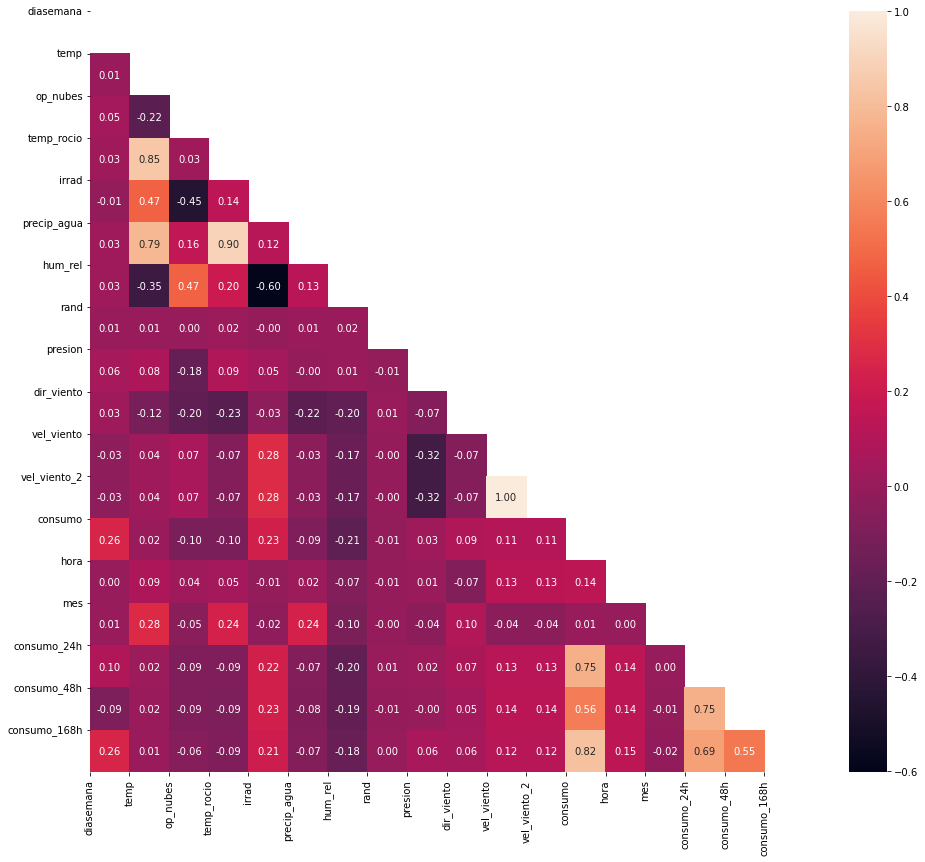

In [41]:
# Otra librería de visualización de datos
import seaborn as sns

# Cálculo de coeficientes de correlación
corr = data.corr(method='pearson') 

# Quitar valores repetidos
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generar Heat Map,
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    # yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    # plot
plt.show()

### 5. Divido los datos

In [42]:
# Atributos X (features); etiquetas y (target)

X = data.drop(['consumo'], axis=1) 
y = data['consumo']

In [43]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # porcentaje de los datos de entrada que utilizaré para validar el modelo

# Divido los datos en datos de entreno, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=False)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size,
                shuffle=False)


### 6. Construcción y evaluación de modelos

Métrica de evaluación:  neg_root_mean_squared_error
Modelo  RFR
Modelo  LR
Modelo  DTR
[('RFR', -5.00587126230458, 1.3536347509890991), ('LR', -5.416160688710127, 1.3848882714392545), ('DTR', -6.854239512958084, 1.3463866915429892)]


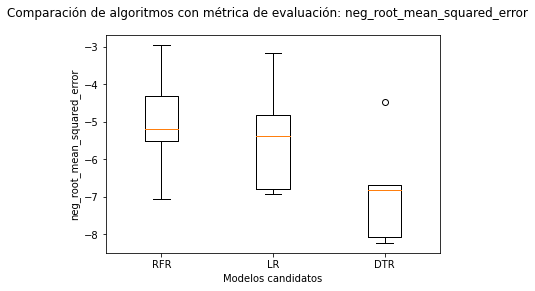

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


num_folds = 5
error_metrics = {'neg_root_mean_squared_error'} 
models = {('LR', LinearRegression()),
           ('DTR', DecisionTreeRegressor()), ('RFR', RandomForestRegressor())}


results = [] # guarda los resultados de las métricas de evaluación
names = []  # Nombre de cada algoritmo
msg = []  # imprime el resumen del método de cross-validation


from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

ite = 0

# Entreno con validación cruzada
for scoring in error_metrics:

    print('Métrica de evaluación: ', scoring)
    for name, model in models:
        print('Modelo ', name)
        cross_validation = KFold(n_splits=num_folds, shuffle=False)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        if ite == 0:
          names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Comparar resultados entre algoritmos
    fig = plt.figure()
    fig.suptitle('Comparación de algoritmos con métrica de evaluación: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Modelos candidatos')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)

    ax.set_xticklabels(names)
    plt.show()

    results = []

    ite += 1


### 7. Ajustar hiperparámetros

In [58]:
# Ajustar los hiperparámetros del algoritmo que os ha dado mejores resultados en el training
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, KFold


#RandomForestClassifier
modelo = RandomForestRegressor()
params = {
     'n_estimators': [500, 1000], #default=100
     'min_samples_split': [2,5], #default=2
     'max_features': ['auto']  #default='auto'
 }
scoring='neg_root_mean_squared_error'
cross_validation = KFold(n_splits=5)
my_cv = cross_validation.split(X_val, y_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

print("Mejor resultado: %f utilizando los siguientes hiperparámetros %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print("%f (%f) with: %r" % (mean, stdev, param))

Mejor resultado: -10.021982 utilizando los siguientes hiperparámetros {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}
-10.021982 (3.632545) with: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}
-10.089661 (3.544937) with: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1000}
-10.088738 (3.627346) with: {'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 500}
-10.079647 (3.611443) with: {'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 1000}


### 8. Evaluación final del modelo

In [39]:
# Entrena al modelo seleccionado con los hiperparámetros seleccionados y realiza las predicciones

modelo_final = RandomForestRegressor(max_features='auto', min_samples_split=2,  n_estimators=500)
modelo_final.fit(X_train,y_train)  # Se entrena al modelo RF
y_predict = modelo_final.predict(X_test)  # Se calculan las predicciones


mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

y_predict


RMSE: 7.775926915651026


array([14.516402, 15.305508, 15.751032, ..., 12.489076, 11.82052 ,
       12.784448])

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


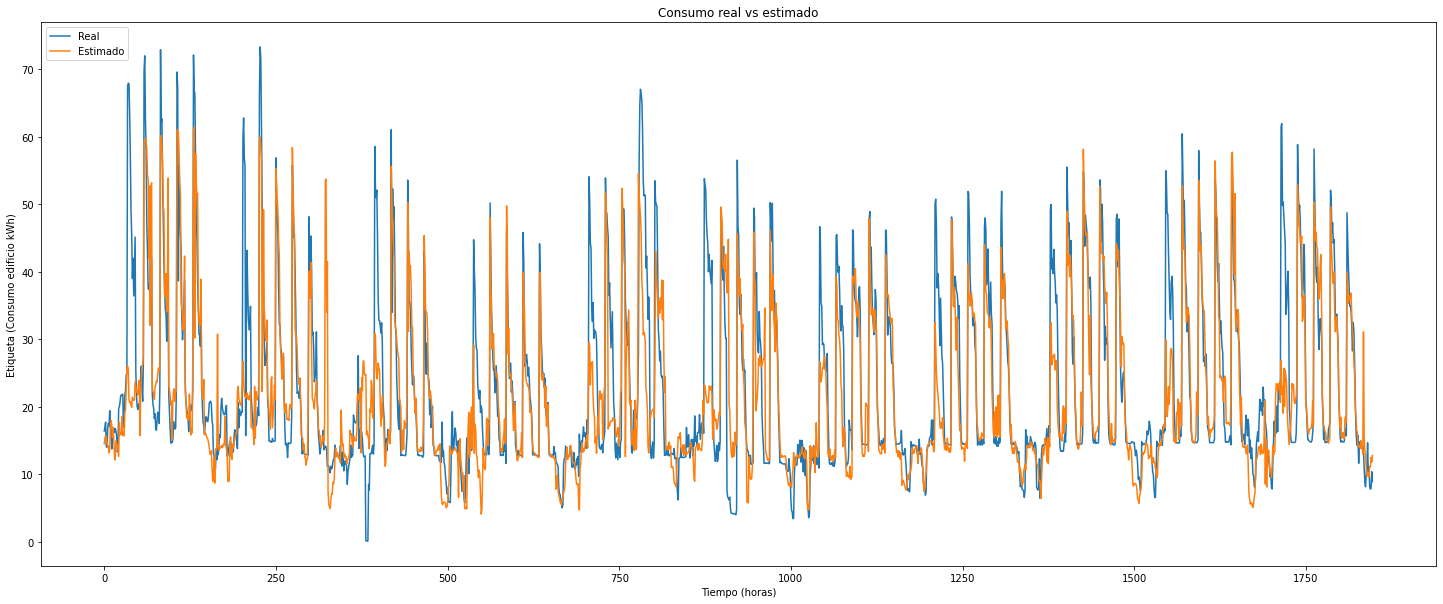

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(25, 10))
sns.lineplot(range(len(y_test)), y_test, label="Real")
sns.lineplot(range(len(y_predict)), y_predict, label="Estimado")
plt.title("Consumo real vs estimado")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Etiqueta (Consumo edificio kWh)")
plt.legend(loc="upper left")
plt.show()


## Las predicciones han mejorado con respecto a la primera iteración!!